# Let's understand MET dataset

In [1]:
import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Let's load dataset
dataset_name = 'met'

if dataset_name not in ['met', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    TEST_CV_FILEPATH = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    TEST_CV_FILEPATH = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_with_head.csv')
    TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    # for debugging
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info

    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(TEST_CV_FILEPATH)
print(IMG_PATH_PREFIX)

test_dataset = dataset.PoseDataset(
    TEST_CV_FILEPATH,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    joint_index=1,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

print("data ready")

15it [00:00, 125.97it/s]

/var/data/MET2/activity_wo.csv
/var/data/MET2
Reading dataset from /var/data/MET2/activity_wo.csv
Downscale images to the height 400px
person /var/data/MET2/image/office activities/walking about/24.png contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [129. 148.]
 [ 95. 138.]
 [158.  76.]
 [266. 110.]
 [237. 176.]
 [ -1.  -1.]
 [205. 101.]
 [203.  13.]]
valid joints:
[[129. 148.]
 [ 95. 138.]
 [158.  76.]
 [266. 110.]
 [237. 176.]
 [205. 101.]
 [203.  13.]]


33it [00:00, 91.57it/s] 

person /var/data/MET2/image/office activities/walking about/33.png contains non-valid joints
[[ -1.  -1.]
 [545. 573.]
 [493. 411.]
 [437. 408.]
 [451. 577.]
 [324. 701.]
 [502. 360.]
 [400. 291.]
 [472. 160.]
 [487. 147.]
 [497. 287.]
 [587. 314.]
 [527. 120.]
 [524.  12.]]
valid joints:
[[545. 573.]
 [493. 411.]
 [437. 408.]
 [451. 577.]
 [324. 701.]
 [502. 360.]
 [400. 291.]
 [472. 160.]
 [487. 147.]
 [497. 287.]
 [587. 314.]
 [527. 120.]
 [524.  12.]]
person /var/data/MET2/image/office activities/walking about/4.png contains non-valid joints
[[ -1.  -1.]
 [200. 412.]
 [186. 333.]
 [251. 324.]
 [246. 401.]
 [254. 447.]
 [152. 307.]
 [160. 247.]
 [166. 174.]
 [278. 162.]
 [293. 243.]
 [296. 289.]
 [214. 141.]
 [213.  82.]]
valid joints:
[[200. 412.]
 [186. 333.]
 [251. 324.]
 [246. 401.]
 [254. 447.]
 [152. 307.]
 [160. 247.]
 [166. 174.]
 [278. 162.]
 [293. 243.]
 [296. 289.]
 [214. 141.]
 [213.  82.]]
person /var/data/MET2/image/office activities/walking about/40.jpg contains non-v

101it [00:00, 141.30it/s]

person /var/data/MET2/image/office activities/walking about/54.jpg contains non-valid joints
[[ -1.  -1.]
 [264. 450.]
 [302. 294.]
 [273. 317.]
 [269. 449.]
 [391. 545.]
 [272. 243.]
 [342. 204.]
 [333. 120.]
 [240. 126.]
 [238. 216.]
 [213. 263.]
 [282.  77.]
 [259.  12.]]
valid joints:
[[264. 450.]
 [302. 294.]
 [273. 317.]
 [269. 449.]
 [391. 545.]
 [272. 243.]
 [342. 204.]
 [333. 120.]
 [240. 126.]
 [238. 216.]
 [213. 263.]
 [282.  77.]
 [259.  12.]]
person /var/data/MET2/image/office activities/walking about/58.png contains non-valid joints
[[453. 753.]
 [443. 676.]
 [408. 454.]
 [548. 454.]
 [512. 671.]
 [ -1.  -1.]
 [365. 337.]
 [391. 361.]
 [399. 211.]
 [600. 228.]
 [583. 388.]
 [586. 501.]
 [500. 169.]
 [494.  44.]]
valid joints:
[[453. 753.]
 [443. 676.]
 [408. 454.]
 [548. 454.]
 [512. 671.]
 [365. 337.]
 [391. 361.]
 [399. 211.]
 [600. 228.]
 [583. 388.]
 [586. 501.]
 [500. 169.]
 [494.  44.]]
person /var/data/MET2/image/office activities/writing/1.bmp contains non-valid j

134it [00:00, 161.60it/s]

person /var/data/MET2/image/office activities/reading.seated/12.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 27. 136.]
 [ 18. 133.]
 [ 47.  77.]
 [139.  84.]
 [188. 150.]
 [159. 104.]
 [102.  84.]
 [114.  18.]]
valid joints:
[[ 27. 136.]
 [ 18. 133.]
 [ 47.  77.]
 [139.  84.]
 [188. 150.]
 [159. 104.]
 [102.  84.]
 [114.  18.]]
person /var/data/MET2/image/office activities/reading.seated/13.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 46. 140.]
 [ 23. 133.]
 [ 26.  81.]
 [ 84.  84.]
 [ 88. 119.]
 [102. 128.]
 [ 61.  81.]
 [ 63.  40.]]
valid joints:
[[ 46. 140.]
 [ 23. 133.]
 [ 26.  81.]
 [ 84.  84.]
 [ 88. 119.]
 [102. 128.]
 [ 61.  81.]
 [ 63.  40.]]
person /var/data/MET2/image/office activities/reading.seated/14.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [108.  71.]
 [ 88. 102.]
 [ 96.  71

157it [00:01, 109.04it/s]

person /var/data/MET2/image/office activities/reading.seated/28.jpg contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [764. 523.]
 [852. 561.]
 [860. 337.]
 [888. 379.]
 [927. 627.]
 [748. 629.]
 [810. 308.]
 [638. 201.]]
valid joints:
[[764. 523.]
 [852. 561.]
 [860. 337.]
 [888. 379.]
 [927. 627.]
 [748. 629.]
 [810. 308.]
 [638. 201.]]
person /var/data/MET2/image/office activities/reading.seated/3.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [121. 133.]
 [ 70. 127.]
 [115.  81.]
 [174.  80.]
 [218. 131.]
 [174. 131.]
 [146.  84.]
 [141.  32.]]
valid joints:
[[121. 133.]
 [ 70. 127.]
 [115.  81.]
 [174.  80.]
 [218. 131.]
 [174. 131.]
 [146.  84.]
 [141.  32.]]
person /var/data/MET2/image/office activities/reading.seated/35.png contains non-valid joints
[[-1.000e+00 -1.000e+00]
 [ 8.460e+02  6.150e+02]
 [ 1.008e+03  5.600e+02]
 [ 1.227e+03  5.730e+02]
 [ 9.380e+02  6

199it [00:01, 120.41it/s]

person /var/data/MET2/image/office activities/reading.seated/58.png contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [504. 688.]
 [263. 546.]
 [423. 380.]
 [724. 429.]
 [917. 619.]
 [674. 648.]
 [578. 467.]
 [691. 351.]]
valid joints:
[[504. 688.]
 [263. 546.]
 [423. 380.]
 [724. 429.]
 [917. 619.]
 [674. 648.]
 [578. 467.]
 [691. 351.]]
person /var/data/MET2/image/office activities/reading.seated/59.jpg contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [264. 476.]
 [361. 622.]
 [477. 468.]
 [611. 532.]
 [357. 703.]
 [282. 465.]
 [511. 420.]
 [523. 236.]]
valid joints:
[[264. 476.]
 [361. 622.]
 [477. 468.]
 [611. 532.]
 [357. 703.]
 [282. 465.]
 [511. 420.]
 [523. 236.]]
person /var/data/MET2/image/office activities/reading.seated/60.jpg contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [121. 187.]
 [  4. 261.]
 [ 78. 141

276it [00:01, 148.20it/s]

person /var/data/MET2/image/office activities/typing/57.bmp contains non-valid joints
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 1.077e+03  8.840e+02]
 [ 6.670e+02  9.010e+02]
 [ 5.900e+02  4.400e+02]
 [ 1.058e+03  4.190e+02]
 [ 1.132e+03  7.640e+02]
 [ 1.327e+03  8.790e+02]
 [ 9.280e+02  4.700e+02]
 [ 1.041e+03  2.130e+02]]
valid joints:
[[1077.  884.]
 [ 667.  901.]
 [ 590.  440.]
 [1058.  419.]
 [1132.  764.]
 [1327.  879.]
 [ 928.  470.]
 [1041.  213.]]
person /var/data/MET2/image/office activities/typing/58.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [497. 417.]
 [304. 414.]
 [279. 206.]
 [522. 214.]
 [530. 376.]
 [594. 388.]
 [435. 188.]
 [485.  49.]]
valid joints:
[[497. 417.]
 [304. 414.]
 [279. 206.]
 [522. 214.]
 [530. 376.]
 [594. 388.]
 [435. 188.]
 [485.  49.]]
person /var/data/MET2/image/office activ

336it [00:02, 158.09it/s]

person /var/data/MET2/image/office activities/filing.seated/58.jpg contains non-valid joints
[[-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [-1.000e+00 -1.000e+00]
 [ 1.816e+03  1.926e+03]
 [ 2.343e+03  2.507e+03]
 [ 2.261e+03  2.156e+03]
 [ 8.210e+02  1.865e+03]
 [ 4.780e+02  1.452e+03]
 [ 9.950e+02  7.620e+02]
 [ 2.000e+03  8.340e+02]
 [ 2.038e+03  1.552e+03]
 [ 1.574e+03  1.720e+03]
 [ 1.430e+03  6.930e+02]
 [ 1.995e+03  1.271e+03]]
valid joints:
[[1816. 1926.]
 [2343. 2507.]
 [2261. 2156.]
 [ 821. 1865.]
 [ 478. 1452.]
 [ 995.  762.]
 [2000.  834.]
 [2038. 1552.]
 [1574. 1720.]
 [1430.  693.]
 [1995. 1271.]]
person /var/data/MET2/image/office activities/filing.seated/59.jpg contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 78. 453.]
 [105. 610.]
 [370. 392.]
 [854. 523.]
 [580. 803.]
 [295. 609.]
 [611. 454.]
 [728. 116.]]
valid joints:
[[ 78. 453.]
 [105. 610.]
 [370. 392.]
 [854. 523.]
 [580. 803.]
 [295. 609.]
 [611. 4

400it [00:02, 171.93it/s]

person /var/data/MET2/image/office activities/filing.stand/60.PNG contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [416. 116.]
 [353. 232.]
 [175. 191.]
 [255. 140.]
 [366. 100.]
 [441.  35.]
 [202. 128.]
 [185.  23.]]
valid joints:
[[416. 116.]
 [353. 232.]
 [175. 191.]
 [255. 140.]
 [366. 100.]
 [441.  35.]
 [202. 128.]
 [185.  23.]]
person /var/data/MET2/image/office activities/filing.stand/7.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ -1.  -1.]
 [103. 114.]
 [129. 114.]
 [137.  74.]
 [163.  88.]
 [148. 148.]
 [ 84. 139.]
 [144.  65.]
 [136.  22.]]
valid joints:
[[103. 114.]
 [129. 114.]
 [137.  74.]
 [163.  88.]
 [148. 148.]
 [ 84. 139.]
 [144.  65.]
 [136.  22.]]
person /var/data/MET2/image/office activities/filing.stand/8.bmp contains non-valid joints
[[ -1.  -1.]
 [ -1.  -1.]
 [ 52. 134.]
 [ 72. 129.]
 [ -1.  -1.]
 [ -1.  -1.]
 [ 79. 124.]
 [ 45. 101.]
 [ 40.  59.]
 [ 74

468it [00:02, 183.26it/s]

person /var/data/MET2/image/resting/seated.quiet/24.jpg contains non-valid joints
[[ -1.  -1.]
 [ 98. 289.]
 [ 99. 253.]
 [168. 250.]
 [164. 287.]
 [ -1.  -1.]
 [ 85. 247.]
 [ 48. 201.]
 [ 78. 127.]
 [188. 123.]
 [209. 200.]
 [184. 242.]
 [132. 101.]
 [133.  45.]]
valid joints:
[[ 98. 289.]
 [ 99. 253.]
 [168. 250.]
 [164. 287.]
 [ 85. 247.]
 [ 48. 201.]
 [ 78. 127.]
 [188. 123.]
 [209. 200.]
 [184. 242.]
 [132. 101.]
 [133.  45.]]
person /var/data/MET2/image/resting/sleeping/16.png contains non-valid joints
[[308. 186.]
 [288. 122.]
 [206. 103.]
 [207.  52.]
 [277.  42.]
 [324.  35.]
 [175. 150.]
 [127. 119.]
 [ 77. 102.]
 [100.  50.]
 [ 52.  15.]
 [ -1.  -1.]
 [ 86.  67.]
 [ 35.  44.]]
valid joints:
[[308. 186.]
 [288. 122.]
 [206. 103.]
 [207.  52.]
 [277.  42.]
 [324.  35.]
 [175. 150.]
 [127. 119.]
 [ 77. 102.]
 [100.  50.]
 [ 52.  15.]
 [ 86.  67.]
 [ 35.  44.]]
person /var/data/MET2/image/resting/sleeping/19.png contains non-valid joints
[[ -1.  -1.]
 [279. 153.]
 [226. 105.]
 [

600it [00:02, 219.42it/s]

person /var/data/MET2/image/resting/sleeping/8.png contains non-valid joints
[[ -1.  -1.]
 [ 62. 274.]
 [101. 192.]
 [126. 186.]
 [ 83. 276.]
 [ -1.  -1.]
 [ 60.  85.]
 [ 38. 105.]
 [ 92.  86.]
 [105.  81.]
 [ 64. 163.]
 [ 48. 122.]
 [ 77.  73.]
 [ 72.  16.]]
valid joints:
[[ 62. 274.]
 [101. 192.]
 [126. 186.]
 [ 83. 276.]
 [ 60.  85.]
 [ 38. 105.]
 [ 92.  86.]
 [105.  81.]
 [ 64. 163.]
 [ 48. 122.]
 [ 77.  73.]
 [ 72.  16.]]
Joints shape: (14, 2)
data ready


number of images = 600
[382 421 433 432 419 387 590 582 597 598 573 580 597 598]


Text(0,0.5,'ratio of valid joints')

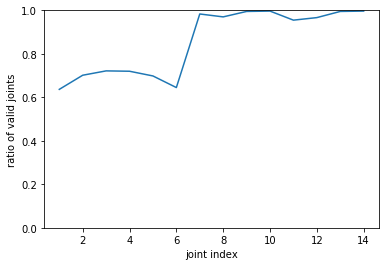

In [3]:
numImages = len(test_dataset.info)
print("number of images = {}".format(numImages))

validJoints = list()
for i, info in enumerate(test_dataset.info):
    #print(info[0])
    #validJoints.append(info[0])
    validJoints.append(info[0][:,0])   # only need X part of valid joints flag
validJoints = np.array(validJoints)  
#print(validJoints)

print(np.sum(validJoints,axis=0))

jointIndex = np.linspace(1,14,14)
plt.plot(jointIndex,np.sum(validJoints,axis=0)/numImages)
plt.ylim(0,1)
plt.xlabel('joint index')
plt.ylabel('ratio of valid joints')




## There are images without HEAD TOP!!!

89
image/office activities/writing/35.jpeg
261
image/office activities/filing.seated/29.jpg


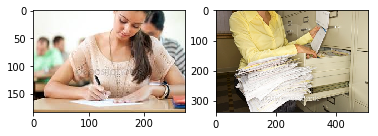

In [12]:
# images without joint 14 (head top)
idxMissing = list()
for i, info in enumerate(test_dataset.info):
    if validJoints[i,13] == 0:
        print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/2),2,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])

 

In [5]:

# # let's plot some of them  manually  
# plt.subplot(121)
# img=test_dataset.get_original_image(89)
# plt.imshow(img[:,:,::-1])

# plt.subplot(122)
# img=test_dataset.get_original_image(379)
# plt.imshow(img[:,:,::-1])


## Let's check joints in upper body

In [9]:
# how many images are missing any joint in upper body?
sum(np.sum(validJoints[:,6:],axis=1) != 8)

61

image/office activities/walking about/24.png
image/office activities/writing/17.bmp
image/office activities/writing/19.bmp
image/office activities/writing/24.jpeg
image/office activities/writing/25.jpeg
image/office activities/writing/27.jpeg
image/office activities/writing/30.jpeg
image/office activities/writing/35.jpeg
image/office activities/writing/58.jpeg
image/office activities/reading.seated/17.jpg
image/office activities/reading.seated/23.png
image/office activities/reading.seated/25.png
image/office activities/typing/10.bmp
image/office activities/typing/33.bmp
image/office activities/filing.seated/1.bmp
image/office activities/filing.seated/10.bmp
image/office activities/filing.seated/12.bmp
image/office activities/filing.seated/13.bmp
image/office activities/filing.seated/19.bmp
image/office activities/filing.seated/2.bmp
image/office activities/filing.seated/20.bmp
image/office activities/filing.seated/24.jpg
image/office activities/filing.seated/27.jpg
image/office activit

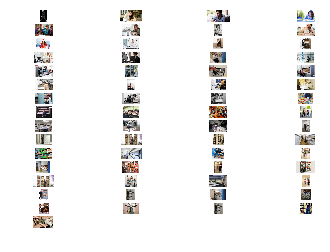

In [11]:
idxMissing = list()
for i, info in enumerate(test_dataset.info):
    if not np.all(validJoints[i,6:]):
        #print(i)
        idxMissing.append(i)
        #print(info)

        image, joints, is_valid_joints, misc = test_dataset.get_example(i)
        print(misc['image_id'])
        #plt.imshow(image)

for i in range(len(idxMissing)):
    idx = idxMissing[i]
    #print(idx)
    plt.subplot(np.ceil(len(idxMissing)/4),4,i+1)

    img=test_dataset.get_original_image(idx)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')